In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import dython

In [2]:
#pip install dython

In [2]:
nsch2021 = pd.read_sas("data/nsch_2021_topical.sas7bdat", encoding="latin-1")

In [3]:
nsch2021.head(10)

,FIPSST,STRATUM,HHID,FORMTYPE,TOTKIDS_R,TENURE,HHLANGUAGE,SC_AGE_YEARS,SC_SEX,K2Q35A_1_YEARS,...,HHCOUNT_IF,HIGRADE,HIGRADE_TVIS,FPL_I1,FPL_I2,FPL_I3,FPL_I4,FPL_I5,FPL_I6,FWC
0,48,1,21000002,T1,2.0,1.0,3.0,2.0,1.0,NaN,...,0.0,3.0,4.0,400.0,400.0,400.0,400.0,400.0,400.0,2068.528102
1,02,1,21000009,T3,1.0,2.0,1.0,12.0,1.0,NaN,...,0.0,2.0,2.0,139.0,139.0,139.0,139.0,139.0,139.0,172.907963
2,40,1,21000017,T2,2.0,1.0,1.0,8.0,1.0,NaN,...,0.0,3.0,4.0,395.0,395.0,395.0,395.0,395.0,395.0,2169.272128
3,26,1,21000030,T1,1.0,1.0,1.0,2.0,2.0,NaN,...,0.0,2.0,2.0,336.0,336.0,336.0,336.0,336.0,336.0,884.196350
4,22,1,21000031,T1,3.0,3.0,1.0,5.0,2.0,NaN,...,0.0,2.0,2.0,96.0,96.0,96.0,96.0,96.0,96.0,812.410936
5,45,1,21000041,T3,1.0,1.0,1.0,12.0,1.0,NaN,...,0.0,2.0,2.0,400.0,400.0,400.0,400.0,400.0,400.0,784.593143
6,02,1,21000043,T1,1.0,1.0,1.0,5.0,1.0,NaN,...,0.0,3.0,4.0,400.0,400.0,400.0,400.0,400.0,400.0,54.155194
7,54,1,21000045,T3,1.0,1.0,1.0,15.0,2.0,NaN,...,0.0,3.0,3.0,400.0,400.0,400.0,400.0,400.0,400.0,158.287643
8,54,1,21000054,T3,2.0,4.0,1.0,17.0,2.0,NaN,...,0.0,3.0,4.0,115.0,115.0,115.0,115.0,115.0,115.0,456.842730
9,16,1,21000057,T1,3.0,1.0,1.0,5.0,1.0,NaN,...,0.0,3.0,4.0,291.0,291.0,291.0,291.0,291.0,291.0,584.455094


In [4]:
nsch2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50892 entries, 0 to 50891
Columns: 461 entries, FIPSST to FWC
dtypes: float64(457), object(4)
memory usage: 179.0+ MB


In [5]:
nsch2021.dtypes.value_counts()

float64    457
object       4
dtype: int64

In [6]:
selected_columns="""BIRTH_YR_F
FIPSST
FORMTYPE
HEADACHE
K2Q01
K2Q30A
K2Q31A
K2Q32A
K2Q33A
K2Q34A
K2Q37A
C4Q04
K4Q22_R
K4Q23
K4Q27
OVERWEIGHT
CURRCOV
INSGAP
AVOIDCHG
K3Q25
BORNUSA
K8Q35
ACE1
ACE10
ACE3
ACE4
ACE5
ACE6
ACE7
ACE8
ACE9
FOODSIT
GOFORHELP
K10Q12
K10Q13
K10Q40_R
A1_AGE
A1_BORN
A1_EMPLOYED
A1_MARITAL
A1_MENTHEALTH
A2_AGE
A2_BORN
A2_EMPLOYED
A2_MARITAL
A2_MENTHEALTH
A2_RELATION
HIGRADE
HOUSE_GEN""".split()

In [7]:
print(selected_columns)
for col in selected_columns:
    print(col)
    print(nsch2021[col].value_counts(dropna=False))

['BIRTH_YR_F', 'FIPSST', 'FORMTYPE', 'HEADACHE', 'K2Q01', 'K2Q30A', 'K2Q31A', 'K2Q32A', 'K2Q33A', 'K2Q34A', 'K2Q37A', 'C4Q04', 'K4Q22_R', 'K4Q23', 'K4Q27', 'OVERWEIGHT', 'CURRCOV', 'INSGAP', 'AVOIDCHG', 'K3Q25', 'BORNUSA', 'K8Q35', 'ACE1', 'ACE10', 'ACE3', 'ACE4', 'ACE5', 'ACE6', 'ACE7', 'ACE8', 'ACE9', 'FOODSIT', 'GOFORHELP', 'K10Q12', 'K10Q13', 'K10Q40_R', 'A1_AGE', 'A1_BORN', 'A1_EMPLOYED', 'A1_MARITAL', 'A1_MENTHEALTH', 'A2_AGE', 'A2_BORN', 'A2_EMPLOYED', 'A2_MARITAL', 'A2_MENTHEALTH', 'A2_RELATION', 'HIGRADE', 'HOUSE_GEN']
BIRTH_YR_F
0.0    49053
1.0     1409
2.0      382
3.0       48
Name: BIRTH_YR_F, dtype: int64
FIPSST
41    2956
55    1959
08    1737
39    1542
13    1400
15    1165
31    1159
23     992
17     969
20     961
22     955
30     945
19     940
02     922
53     920
49     919
34     917
28     915
05     914
46     909
10     908
09     906
48     901
12     895
26     895
40     892
21     891
45     891
54     888
51     884
06     882
18     880
44     872
04

In [8]:
# NaN Percentage
for col in selected_columns:
    print(col)
    print(((nsch2021[col].isna().sum()) / 50892 * 100).round(2))

BIRTH_YR_F
0.0
FIPSST
0.0
FORMTYPE
0.0
HEADACHE
0.22
K2Q01
0.22
K2Q30A
0.3
K2Q31A
0.56
K2Q32A
0.33
K2Q33A
0.39
K2Q34A
0.35
K2Q37A
0.38
C4Q04
0.57
K4Q22_R
0.5
K4Q23
2.6
K4Q27
0.4
OVERWEIGHT
0.46
CURRCOV
0.43
INSGAP
0.93
AVOIDCHG
1.18
K3Q25
29.64
BORNUSA
0.98
K8Q35
2.29
ACE1
2.19
ACE10
4.1
ACE3
3.71
ACE4
3.89
ACE5
3.98
ACE6
4.03
ACE7
4.06
ACE8
4.07
ACE9
3.99
FOODSIT
2.78
GOFORHELP
3.31
K10Q12
2.86
K10Q13
2.97
K10Q40_R
3.15
A1_AGE
3.16
A1_BORN
3.06
A1_EMPLOYED
3.73
A1_MARITAL
3.6
A1_MENTHEALTH
3.52
A2_AGE
17.96
A2_BORN
18.78
A2_EMPLOYED
18.16
A2_MARITAL
18.31
A2_MENTHEALTH
18.15
A2_RELATION
3.48
HIGRADE
0.0
HOUSE_GEN
1.96


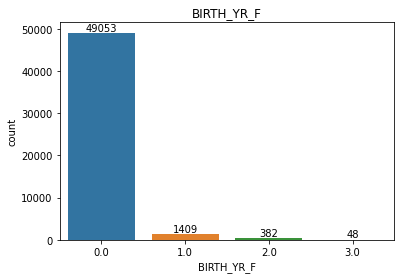

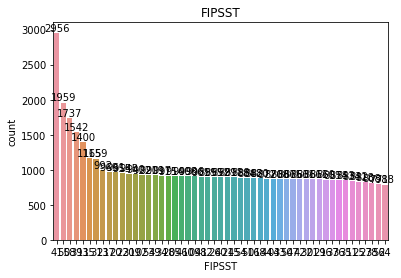

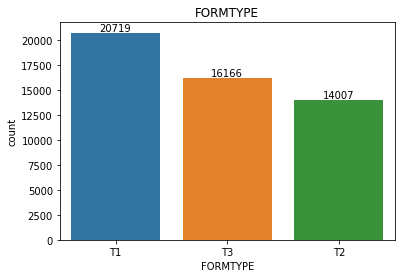

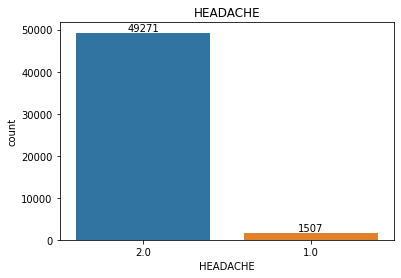

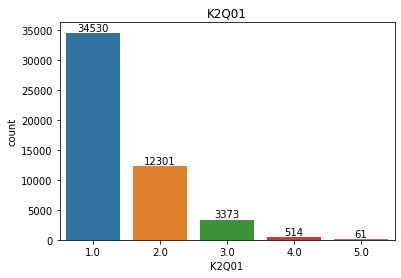

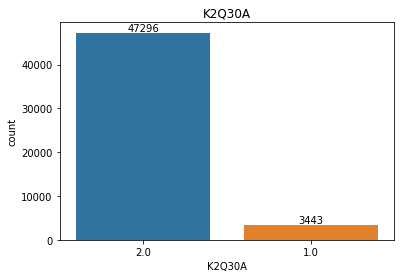

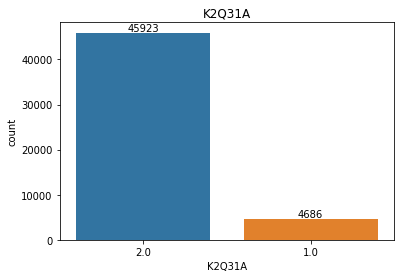

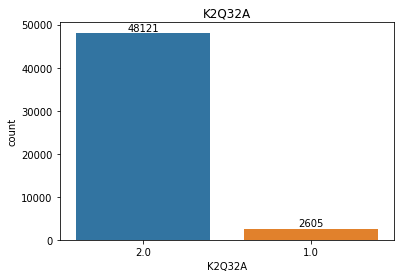

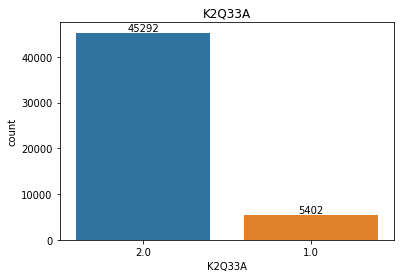

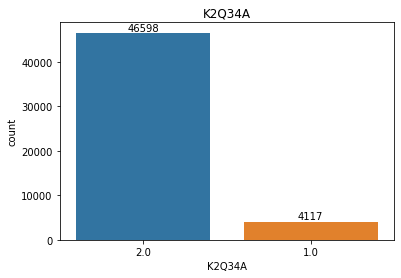

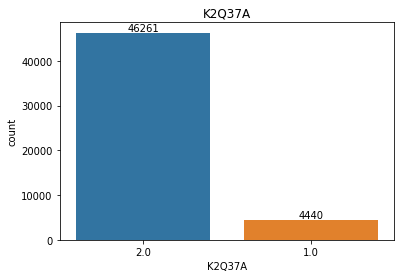

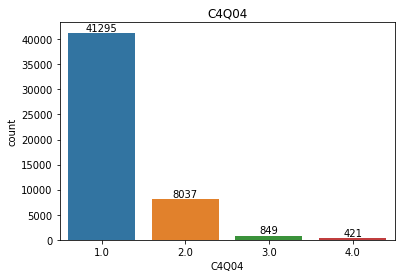

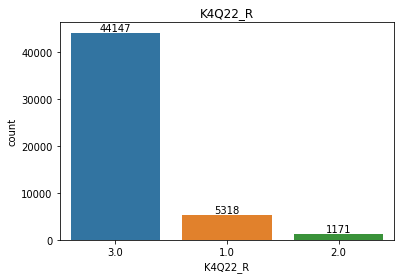

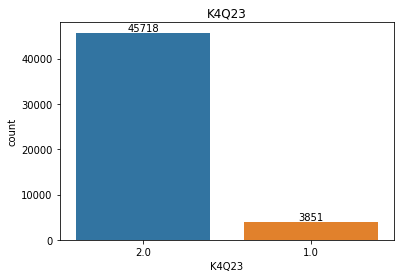

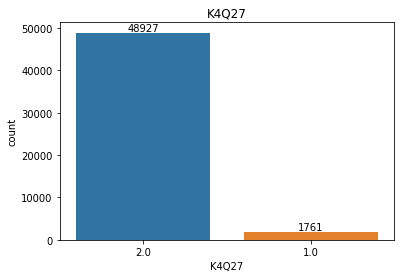

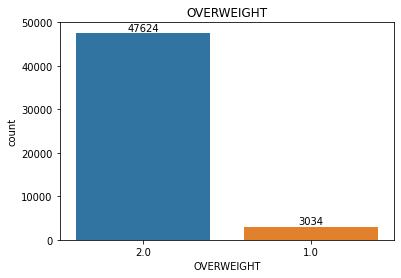

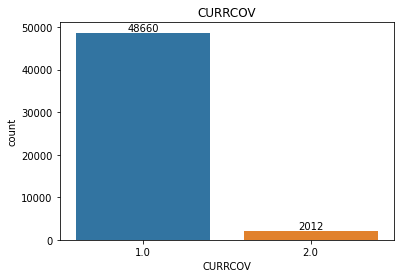

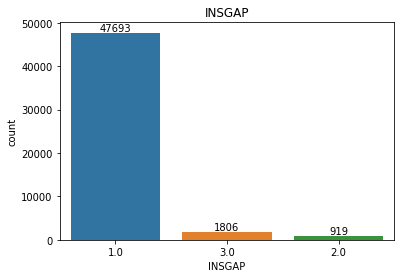

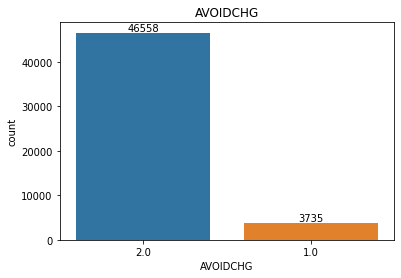

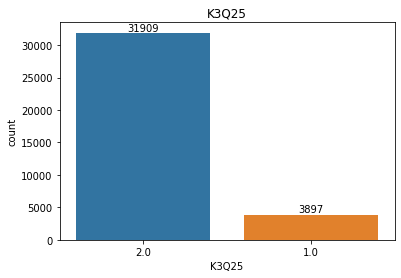

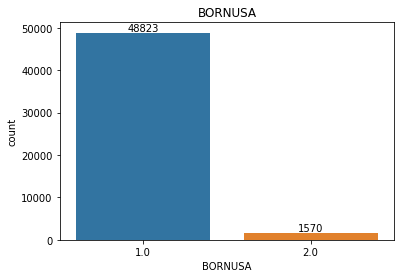

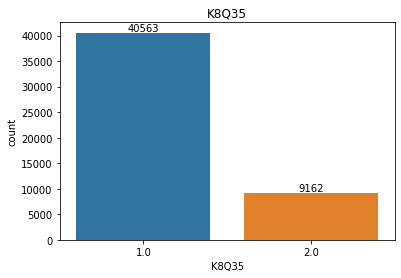

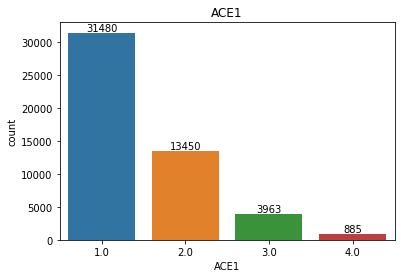

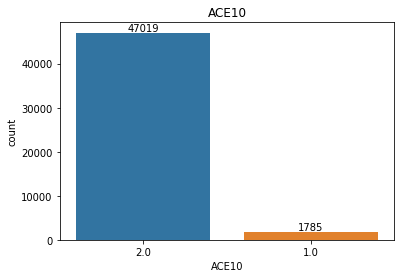

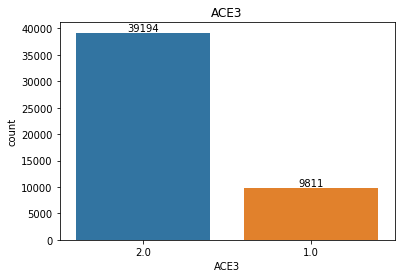

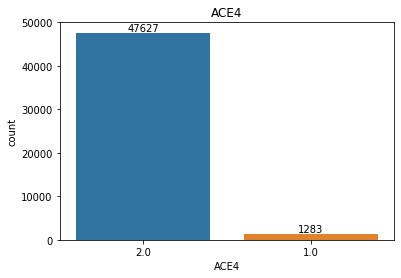

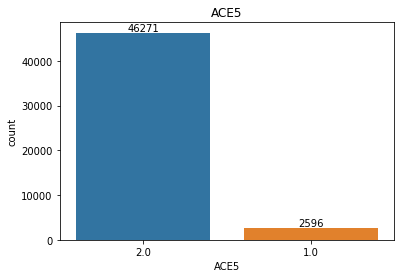

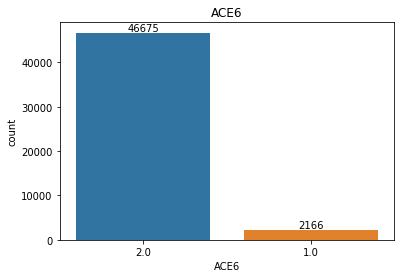

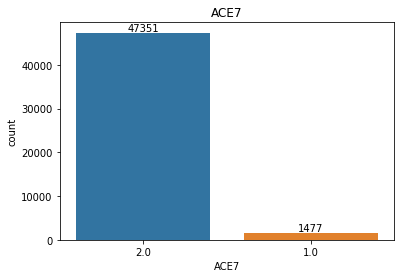

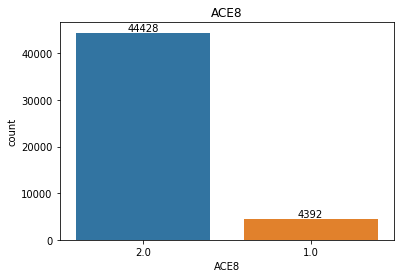

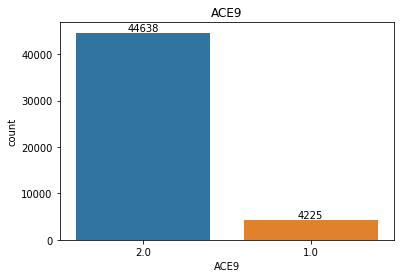

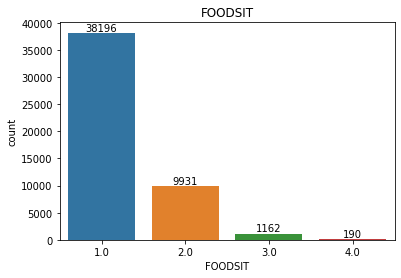

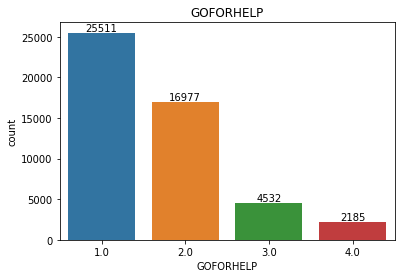

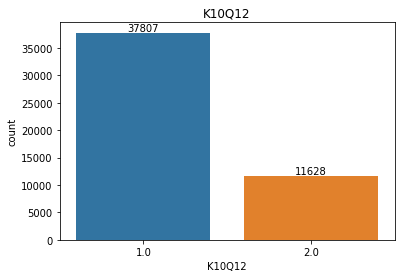

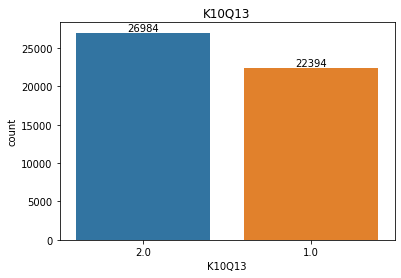

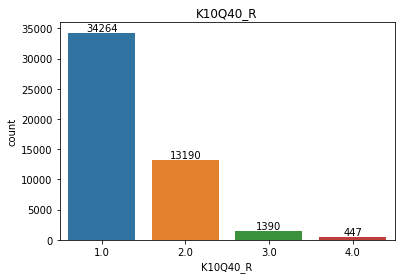

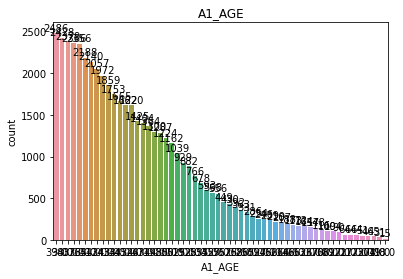

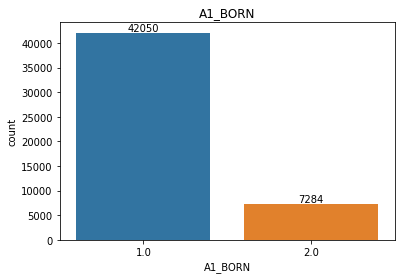

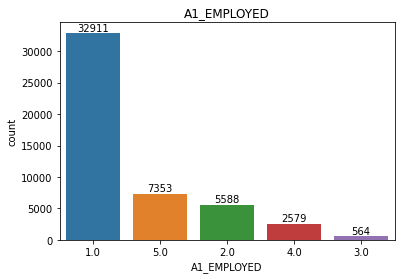

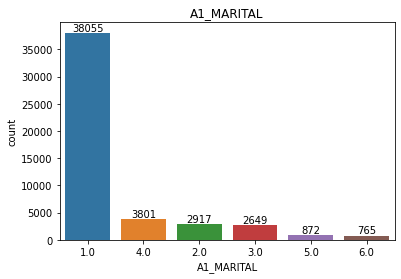

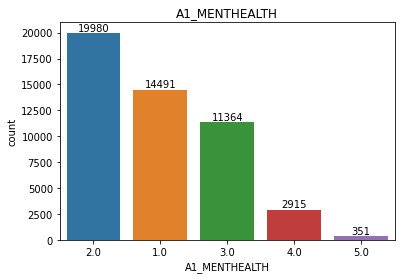

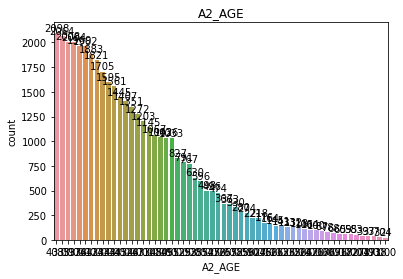

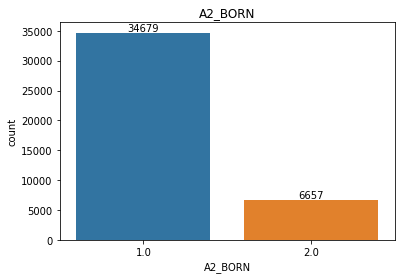

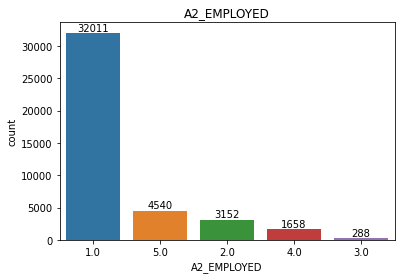

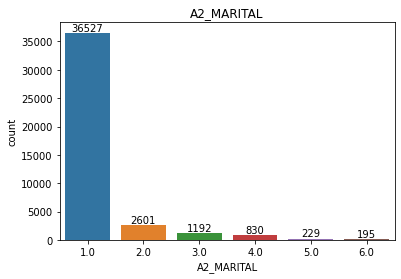

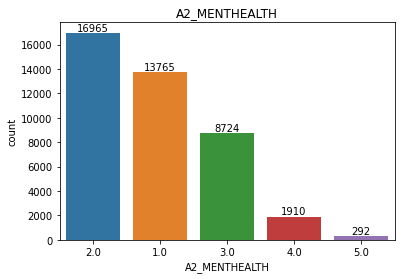

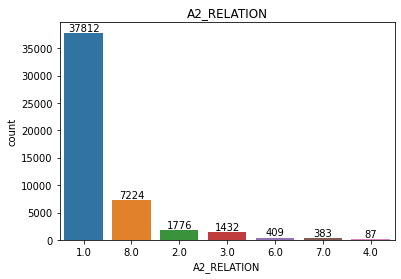

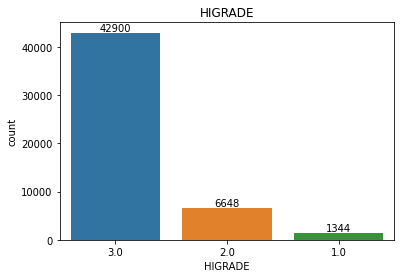

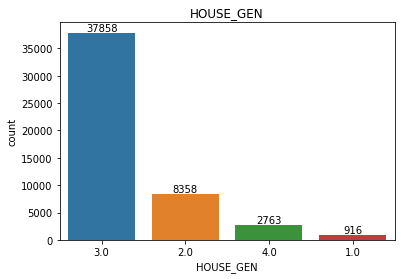

In [9]:
#Graphs with bar charts
for col in selected_columns: 
    ax=sns.countplot(x=nsch2021[col], order=nsch2021[col].value_counts(ascending=False).index)
    abs_values=nsch2021[col].value_counts(ascending=False).values
    ax.set_title(col)
    ax.bar_label(container=ax.containers[0], labels=abs_values)
    selected_columns ==['col']
    #print(selected_columns)
    plt.show()

In [13]:
#healthcare services and depression,anxiety, learning disability, adhd, behavior problems, speech disorder
healthcare_services = nsch2021[['C4Q04', 
                      'K4Q22_R',
                      'K4Q23',
                      'K4Q27',
                      'OVERWEIGHT',
                      'K2Q30A',
                      'K2Q31A',
                      'K2Q32A',
                      'K2Q33A', 
                      'K2Q34A',
                      'K2Q37A'
                     ]]

In [14]:
ace = nsch2021[['ACE1',
                    'ACE10',
                    'ACE3',
                    'ACE4',
                    'ACE5',
                    'ACE6',
                    'ACE7',
                    'ACE8',
                    'ACE9',
                    'K2Q30A',
                      'K2Q31A',
                      'K2Q32A',
                      'K2Q33A', 
                      'K2Q34A',
                      'K2Q37A']]

In [15]:
#health insurance and depression,anxiety, learning disability, adhd, behavior problems, speech disorder

health_ins = nsch2021[['CURRCOV',
                      #'INSGAP',
                      'AVOIDCHG',
                      'K3Q25',
                      'K2Q30A',
                      'K2Q31A',
                      'K2Q32A',
                      'K2Q33A', 
                      'K2Q34A',
                      'K2Q37A'
                     ]]

In [16]:
#knows where to go for help, has someone for emotioanl support and depression,anxiety, learning disability, adhd, behavior problems, speech disorder

support = nsch2021[['K8Q35',
                        'GOFORHELP',
                        'K2Q30A',
                      'K2Q31A',
                      'K2Q32A',
                      'K2Q33A', 
                      'K2Q34A',
                      'K2Q37A']]
                    

In [17]:
#safe neighborhood, rec center, park/playground, and depression,anxiety, learning disability, adhd, behavior problems, speech disorder

neighborhood= nsch2021[['K10Q12',
                        'K10Q13',
                        'K10Q40_R',
                        'FOODSIT',
                        'K2Q30A',
                      'K2Q31A',
                      'K2Q32A',
                      'K2Q33A', 
                      'K2Q34A',
                      'K2Q37A']]

In [18]:
#adult related qs (employment, marital status, MH, etc) and depression,anxiety, learning disability, adhd, behavior problems, speech disorder

adult= nsch2021[['A1_BORN',
                     'A1_EMPLOYED',
                     'A1_MARITAL',
                     'A1_MENTHEALTH',
                     'A2_AGE',
                     'A2_BORN',
                     'A2_EMPLOYED',
                     'A2_MARITAL',
                     'A2_MENTHEALTH',
                     'A2_RELATION',
                     'HIGRADE',
                     'HOUSE_GEN',
                       'K2Q30A',
                      'K2Q31A',
                      'K2Q32A',
                      'K2Q33A', 
                      'K2Q34A',
                      'K2Q37A'
                    ]]

In [19]:
#ace qs with adult related qs

ace_adult = nsch2021[['A1_BORN',
                     'A1_EMPLOYED',
                     'A1_MARITAL',
                     'A1_MENTHEALTH',
                     'A2_AGE',
                     'A2_BORN',
                     'A2_EMPLOYED',
                     'A2_MARITAL',
                     'A2_MENTHEALTH',
                     'A2_RELATION',
                     'HIGRADE',
                     'HOUSE_GEN',
                       'K2Q30A',
                         'ACE1',
                    'ACE10',
                    'ACE3',
                    'ACE4',
                    'ACE5',
                    'ACE6',
                    'ACE7',
                    'ACE8',
                    'ACE9']]

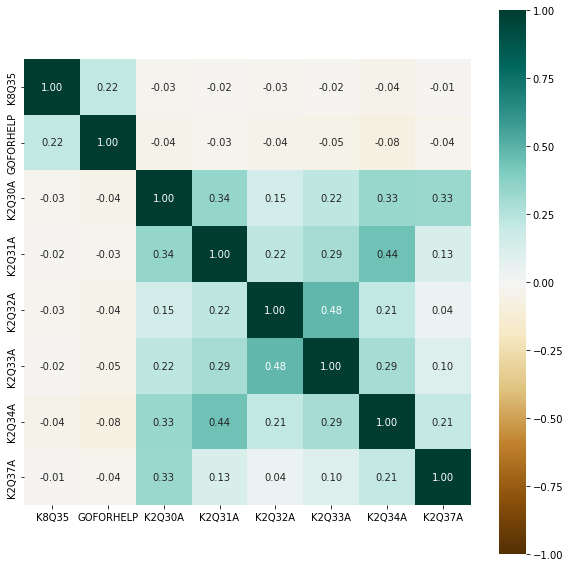

{'corr':               K8Q35  GOFORHELP    K2Q30A    K2Q31A    K2Q32A    K2Q33A  \
 K8Q35      1.000000   0.215635 -0.026479 -0.022537 -0.029154 -0.022602   
 GOFORHELP  0.215635   1.000000 -0.044922 -0.026823 -0.042399 -0.051842   
 K2Q30A    -0.026479  -0.044922  1.000000  0.343130  0.153299  0.223911   
 K2Q31A    -0.022537  -0.026823  0.343130  1.000000  0.221298  0.291615   
 K2Q32A    -0.029154  -0.042399  0.153299  0.221298  1.000000  0.478439   
 K2Q33A    -0.022602  -0.051842  0.223911  0.291615  0.478439  1.000000   
 K2Q34A    -0.042832  -0.075021  0.329539  0.439767  0.211788  0.291910   
 K2Q37A    -0.011043  -0.038234  0.326011  0.126559  0.040857  0.104706   
 
              K2Q34A    K2Q37A  
 K8Q35     -0.042832 -0.011043  
 GOFORHELP -0.075021 -0.038234  
 K2Q30A     0.329539  0.326011  
 K2Q31A     0.439767  0.126559  
 K2Q32A     0.211788  0.040857  
 K2Q33A     0.291910  0.104706  
 K2Q34A     1.000000  0.208934  
 K2Q37A     0.208934  1.000000  ,
 'ax': <AxesSubpl

In [16]:
dython.nominal.associations(support, cmap = 'BrBG', figsize= (10,10))

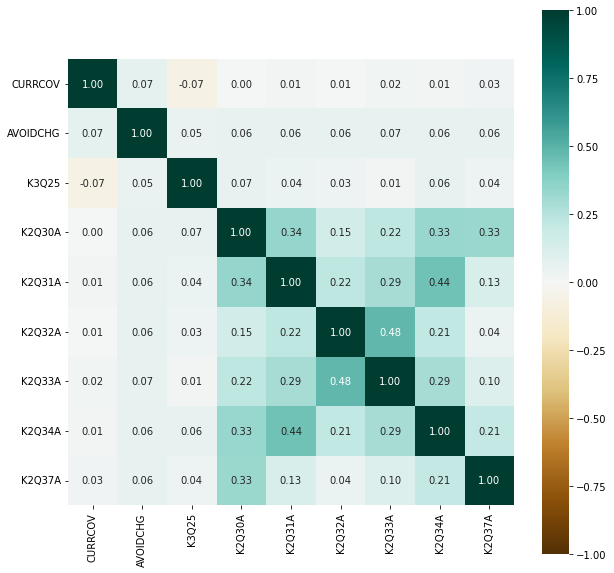

{'corr':            CURRCOV  AVOIDCHG     K3Q25    K2Q30A    K2Q31A    K2Q32A  \
 CURRCOV   1.000000  0.071312 -0.067657  0.004893  0.009440  0.007103   
 AVOIDCHG  0.071312  1.000000  0.047808  0.063094  0.058764  0.055262   
 K3Q25    -0.067657  0.047808  1.000000  0.068032  0.043767  0.032637   
 K2Q30A    0.004893  0.063094  0.068032  1.000000  0.343130  0.153299   
 K2Q31A    0.009440  0.058764  0.043767  0.343130  1.000000  0.221298   
 K2Q32A    0.007103  0.055262  0.032637  0.153299  0.221298  1.000000   
 K2Q33A    0.019386  0.069016  0.011201  0.223911  0.291615  0.478439   
 K2Q34A    0.013041  0.063855  0.064269  0.329539  0.439767  0.211788   
 K2Q37A    0.027048  0.055905  0.035507  0.326011  0.126559  0.040857   
 
             K2Q33A    K2Q34A    K2Q37A  
 CURRCOV   0.019386  0.013041  0.027048  
 AVOIDCHG  0.069016  0.063855  0.055905  
 K3Q25     0.011201  0.064269  0.035507  
 K2Q30A    0.223911  0.329539  0.326011  
 K2Q31A    0.291615  0.439767  0.126559  
 K2Q32A 

In [17]:
dython.nominal.associations(health_ins, cmap = 'BrBG', figsize= (10,10))

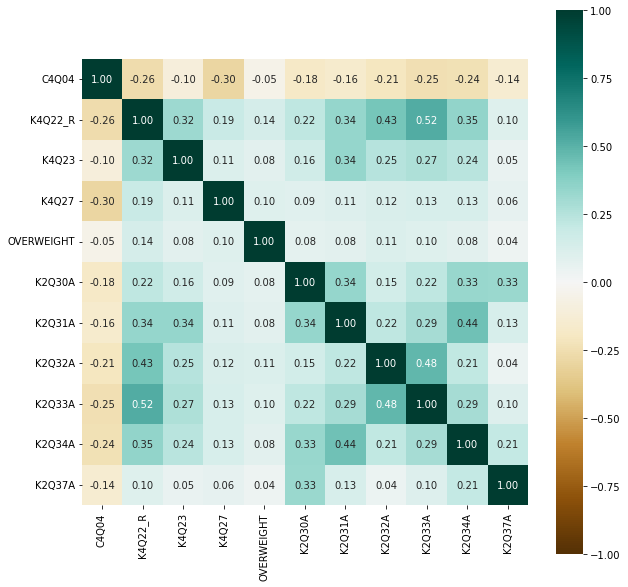

{'corr':                C4Q04   K4Q22_R     K4Q23     K4Q27  OVERWEIGHT    K2Q30A  \
 C4Q04       1.000000 -0.261598 -0.103247 -0.296125   -0.052927 -0.181565   
 K4Q22_R    -0.261598  1.000000  0.315119  0.194621    0.136889  0.219693   
 K4Q23      -0.103247  0.315119  1.000000  0.113557    0.080807  0.160999   
 K4Q27      -0.296125  0.194621  0.113557  1.000000    0.096505  0.090147   
 OVERWEIGHT -0.052927  0.136889  0.080807  0.096505    1.000000  0.076994   
 K2Q30A     -0.181565  0.219693  0.160999  0.090147    0.076994  1.000000   
 K2Q31A     -0.162239  0.336288  0.341018  0.108315    0.082198  0.343130   
 K2Q32A     -0.207941  0.429595  0.245272  0.117413    0.114391  0.153299   
 K2Q33A     -0.248212  0.518186  0.268161  0.128077    0.100831  0.223911   
 K2Q34A     -0.238624  0.348115  0.241873  0.130015    0.081256  0.329539   
 K2Q37A     -0.143242  0.100195  0.051003  0.063328    0.038073  0.326011   
 
               K2Q31A    K2Q32A    K2Q33A    K2Q34A    K2Q37A  
 C

In [18]:
dython.nominal.associations(healthcare_services, cmap = 'BrBG', figsize= (10,10))

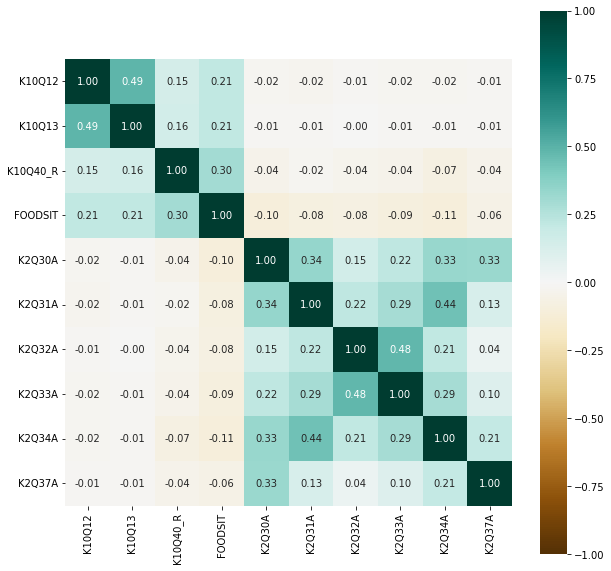

{'corr':             K10Q12    K10Q13  K10Q40_R   FOODSIT    K2Q30A    K2Q31A  \
 K10Q12    1.000000  0.488226  0.147877  0.212203 -0.017910 -0.023489   
 K10Q13    0.488226  1.000000  0.156165  0.211384 -0.009298 -0.009053   
 K10Q40_R  0.147877  0.156165  1.000000  0.303535 -0.041179 -0.023326   
 FOODSIT   0.212203  0.211384  0.303535  1.000000 -0.102759 -0.078571   
 K2Q30A   -0.017910 -0.009298 -0.041179 -0.102759  1.000000  0.343130   
 K2Q31A   -0.023489 -0.009053 -0.023326 -0.078571  0.343130  1.000000   
 K2Q32A   -0.010598 -0.002879 -0.036555 -0.077713  0.153299  0.221298   
 K2Q33A   -0.018061 -0.013204 -0.043409 -0.093388  0.223911  0.291615   
 K2Q34A   -0.018781 -0.014289 -0.071576 -0.108078  0.329539  0.439767   
 K2Q37A   -0.009153 -0.013499 -0.040560 -0.061652  0.326011  0.126559   
 
             K2Q32A    K2Q33A    K2Q34A    K2Q37A  
 K10Q12   -0.010598 -0.018061 -0.018781 -0.009153  
 K10Q13   -0.002879 -0.013204 -0.014289 -0.013499  
 K10Q40_R -0.036555 -0.043409 -

In [19]:
dython.nominal.associations(neighborhood, cmap = 'BrBG', figsize= (10,10))

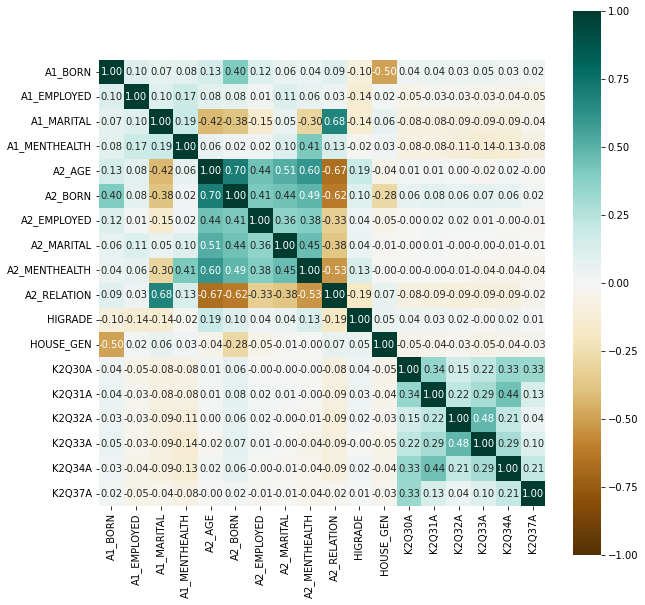

{'corr':                 A1_BORN  A1_EMPLOYED  A1_MARITAL  A1_MENTHEALTH    A2_AGE  \
 A1_BORN        1.000000     0.103322    0.072386       0.079555  0.134755   
 A1_EMPLOYED    0.103322     1.000000    0.095456       0.172044  0.082618   
 A1_MARITAL     0.072386     0.095456    1.000000       0.192112 -0.423369   
 A1_MENTHEALTH  0.079555     0.172044    0.192112       1.000000  0.061278   
 A2_AGE         0.134755     0.082618   -0.423369       0.061278  1.000000   
 A2_BORN        0.400196     0.076526   -0.383810       0.023890  0.703039   
 A2_EMPLOYED    0.116691     0.010502   -0.154836       0.024352  0.443450   
 A2_MARITAL     0.063561     0.109567    0.048518       0.101946  0.513544   
 A2_MENTHEALTH  0.041278     0.055380   -0.297233       0.411645  0.601589   
 A2_RELATION    0.093086     0.034055    0.677604       0.125954 -0.670202   
 HIGRADE       -0.101107    -0.140329   -0.143111      -0.015808  0.189713   
 HOUSE_GEN     -0.499589     0.018293    0.063260       

In [20]:
dython.nominal.associations(adult, cmap = 'BrBG', figsize= (10,10))

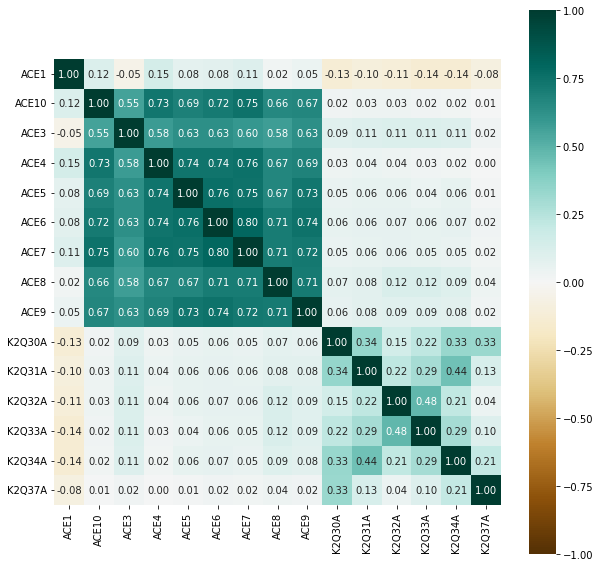

{'corr':             ACE1     ACE10      ACE3      ACE4      ACE5      ACE6      ACE7  \
 ACE1    1.000000  0.115042 -0.053722  0.145325  0.077181  0.083510  0.107603   
 ACE10   0.115042  1.000000  0.554919  0.731510  0.692163  0.718615  0.748556   
 ACE3   -0.053722  0.554919  1.000000  0.582993  0.631456  0.630523  0.598723   
 ACE4    0.145325  0.731510  0.582993  1.000000  0.736090  0.737404  0.757151   
 ACE5    0.077181  0.692163  0.631456  0.736090  1.000000  0.758976  0.745261   
 ACE6    0.083510  0.718615  0.630523  0.737404  0.758976  1.000000  0.795796   
 ACE7    0.107603  0.748556  0.598723  0.757151  0.745261  0.795796  1.000000   
 ACE8    0.021941  0.657730  0.577817  0.667816  0.666837  0.708409  0.706586   
 ACE9    0.045201  0.667450  0.626937  0.685474  0.730728  0.742892  0.720127   
 K2Q30A -0.125254  0.024594  0.086102  0.031356  0.054547  0.057828  0.049599   
 K2Q31A -0.099772  0.032710  0.109146  0.040293  0.060845  0.063117  0.055742   
 K2Q32A -0.114029  0

In [21]:
dython.nominal.associations(ace, cmap = 'BrBG', figsize= (10,10))

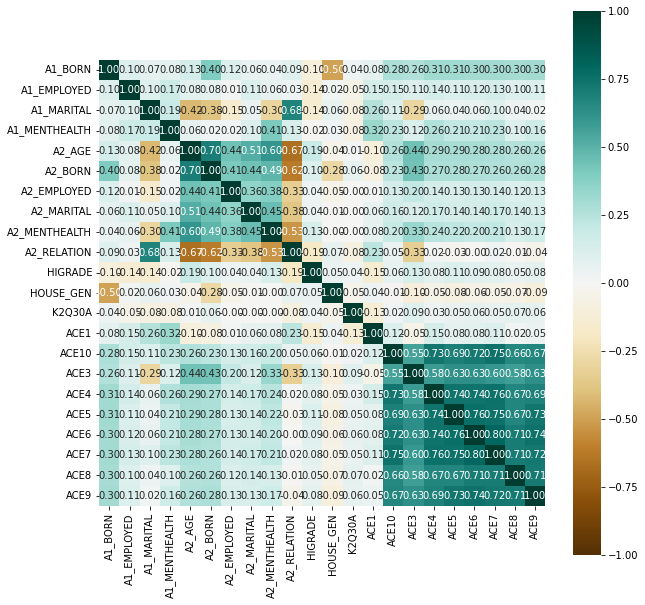

{'corr':                 A1_BORN  A1_EMPLOYED  A1_MARITAL  A1_MENTHEALTH    A2_AGE  \
 A1_BORN        1.000000     0.103322    0.072386       0.079555  0.134755   
 A1_EMPLOYED    0.103322     1.000000    0.095456       0.172044  0.082618   
 A1_MARITAL     0.072386     0.095456    1.000000       0.192112 -0.423369   
 A1_MENTHEALTH  0.079555     0.172044    0.192112       1.000000  0.061278   
 A2_AGE         0.134755     0.082618   -0.423369       0.061278  1.000000   
 A2_BORN        0.400196     0.076526   -0.383810       0.023890  0.703039   
 A2_EMPLOYED    0.116691     0.010502   -0.154836       0.024352  0.443450   
 A2_MARITAL     0.063561     0.109567    0.048518       0.101946  0.513544   
 A2_MENTHEALTH  0.041278     0.055380   -0.297233       0.411645  0.601589   
 A2_RELATION    0.093086     0.034055    0.677604       0.125954 -0.670202   
 HIGRADE       -0.101107    -0.140329   -0.143111      -0.015808  0.189713   
 HOUSE_GEN     -0.499589     0.018293    0.063260       

In [22]:
dython.nominal.associations(ace_adult, cmap = 'BrBG', figsize= (10,10))

---

# Extended Analysis

## Data Cleaning

In [10]:
# creating df of selected columms from main dataset

nsch2021_clean = nsch2021[selected_columns]

In [12]:
# changing some column names

nsch2021_clean.rename(columns = {'K2Q01':'GENERAL_HEALTH', 
                      'K2Q30A':'LEARNING_DIS',
                      'K2Q31A':'ADD_ADHD', 
                      'K2Q32A':'DEPRESSION', 
                      'K2Q33A':'ANXIETY', 
                      'K2Q34A':'BEHAVIOR_PROBS', 
                      'K2Q37A':'SPEECH_DIS', 
                      'C4Q04':'FRUSTRATED_GET_SERVICE', 
                      'K4Q22_R':'RECEIVED_TREAT', 
                      'K4Q23':'TAKEN_MEDS', 
                      'K4Q27':'NEED_CARE_NOT_RECEIVED', 
                      'K3Q25':'PROBS_PAY', 
                      'K8Q35':'EMOTIONAL_SUPPORT', 
                      'K10Q12':'HOOD_PARK', 
                      'K10Q13':'HOOD_REC', 
                      'K10Q40_R':'HOOD_SAFETY'})

,BIRTH_YR_F,FIPSST,FORMTYPE,HEADACHE,GENERAL_HEALTH,LEARNING_DIS,ADD_ADHD,DEPRESSION,ANXIETY,BEHAVIOR_PROBS,...,A1_MARITAL,A1_MENTHEALTH,A2_AGE,A2_BORN,A2_EMPLOYED,A2_MARITAL,A2_MENTHEALTH,A2_RELATION,HIGRADE,HOUSE_GEN
0,1.0,48,T1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,3.0,31.0,2.0,1.0,1.0,3.0,1.0,3.0,2.0
1,0.0,02,T3,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,4.0,NaN,NaN,NaN,NaN,NaN,8.0,2.0,3.0
2,0.0,40,T2,2.0,1.0,2.0,2.0,2.0,2.0,2.0,...,1.0,3.0,46.0,1.0,1.0,1.0,2.0,1.0,3.0,3.0
3,0.0,26,T1,2.0,1.0,2.0,2.0,2.0,2.0,2.0,...,1.0,3.0,31.0,1.0,1.0,1.0,3.0,1.0,2.0,3.0
4,0.0,22,T1,2.0,1.0,2.0,2.0,2.0,2.0,2.0,...,1.0,1.0,22.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50887,0.0,55,T3,2.0,1.0,2.0,2.0,2.0,2.0,2.0,...,1.0,2.0,50.0,1.0,1.0,1.0,2.0,1.0,3.0,3.0
50888,0.0,36,T2,2.0,1.0,2.0,2.0,2.0,2.0,2.0,...,1.0,3.0,38.0,1.0,1.0,1.0,3.0,1.0,3.0,3.0
50889,0.0,30,T2,2.0,1.0,2.0,2.0,2.0,2.0,2.0,...,1.0,1.0,47.0,1.0,1.0,1.0,2.0,1.0,3.0,2.0
50890,0.0,55,T3,2.0,1.0,2.0,1.0,2.0,2.0,1.0,...,1.0,1.0,42.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0


In [35]:
# floats to categorical (except parent age columns)

for col in nsch2021_clean.columns:
    if (col == 'A1_AGE') | (col == 'A2_AGE'):
        pass
    else:
        nsch2021_clean[col] = nsch2021_clean[col].astype('category')
        
nsch2021_clean.dtypes

<ipython-input-35-fed6779eb7ef>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nsch2021_clean[col] = nsch2021_clean[col].astype('category')


BIRTH_YR_F                category
FIPSST                    category
FORMTYPE                  category
HEADACHE                  category
GENERAL_HEALTH            category
LEARNING_DIS              category
ADD_ADHD                  category
DEPRESSION                category
ANXIETY                   category
BEHAVIOR_PROBS            category
SPEECH_DIS                category
FRUSTRATED_GET_SERVICE    category
RECEIVED_TREAT            category
TAKEN_MEDS                category
NEED_CARE_NOT_RECEIVED    category
OVERWEIGHT                category
CURRCOV                   category
INSGAP                    category
AVOIDCHG                  category
PROBS_PAY                 category
BORNUSA                   category
EMOTIONAL_SUPPORT         category
ACE1                      category
ACE10                     category
ACE3                      category
ACE4                      category
ACE5                      category
ACE6                      category
ACE7                

In [41]:
nsch2021_clean.to_csv('data/nsch2021_clean.csv')

## Depression

### Subsetting for children diagnosed with depression (`DEPRESSION` = 1)

In [36]:
# subset df2 to where children have depression

yes_depression = nsch2021_clean[nsch2021_clean['DEPRESSION'] == 1]

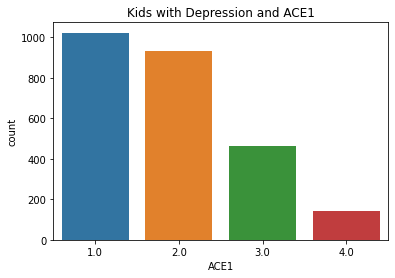

1.0    0.399063
2.0    0.364701
3.0    0.180789
4.0    0.055447
Name: ACE1, dtype: float64


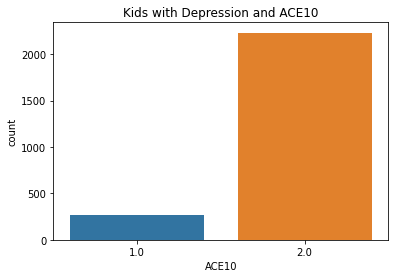

2.0    0.894188
1.0    0.105812
Name: ACE10, dtype: float64


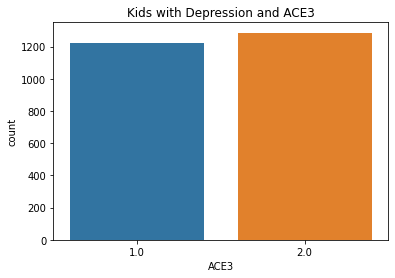

2.0    0.512351
1.0    0.487649
Name: ACE3, dtype: float64


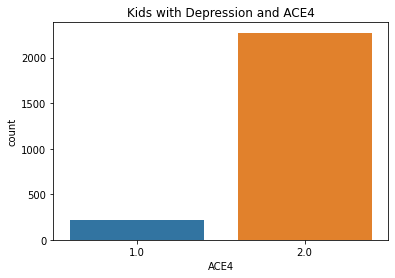

2.0    0.911387
1.0    0.088613
Name: ACE4, dtype: float64


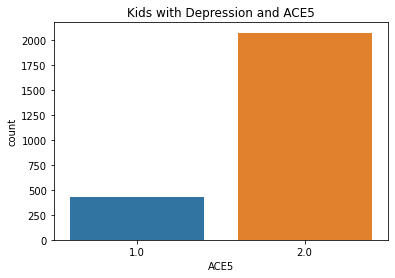

2.0    0.828811
1.0    0.171189
Name: ACE5, dtype: float64


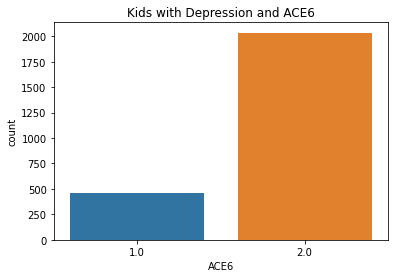

2.0    0.814326
1.0    0.185674
Name: ACE6, dtype: float64


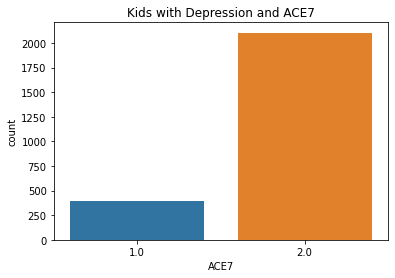

2.0    0.8416
1.0    0.1584
Name: ACE7, dtype: float64


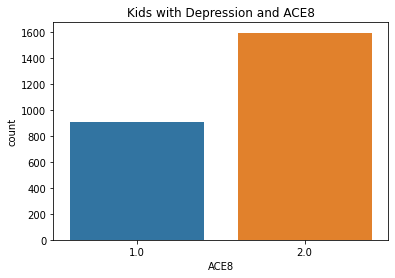

2.0    0.637855
1.0    0.362145
Name: ACE8, dtype: float64


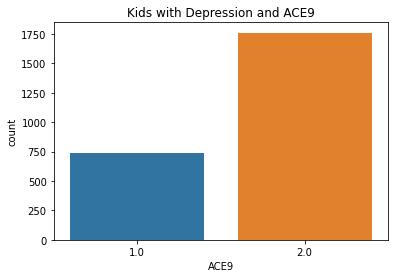

2.0    0.704846
1.0    0.295154
Name: ACE9, dtype: float64


In [37]:
aces = ['ACE1', 'ACE10', 'ACE3', 'ACE4', 'ACE5', 'ACE6', 'ACE7', 'ACE8', 'ACE9']

for i in aces:
    ax = sns.countplot(x=yes_depression[i])
    ax.set_title('Kids with Depression and ' + i)
    plt.show()
    print(yes_depression[i].value_counts(normalize=True)) # shows percentage per category

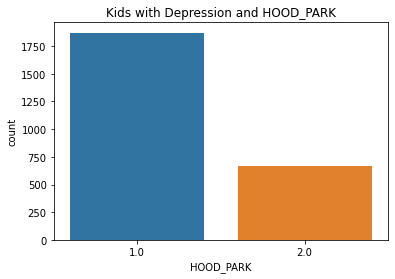

1.0    0.736801
2.0    0.263199
Name: HOOD_PARK, dtype: float64


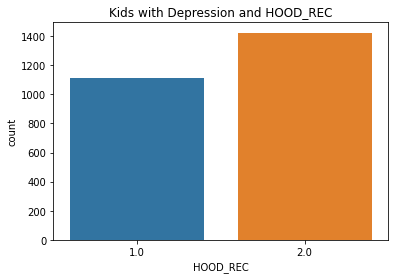

2.0    0.56112
1.0    0.43888
Name: HOOD_REC, dtype: float64


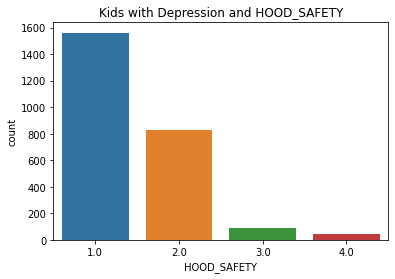

1.0    0.616752
2.0    0.327539
3.0    0.036744
4.0    0.018965
Name: HOOD_SAFETY, dtype: float64


In [38]:
neighborhood = ['HOOD_PARK', 'HOOD_REC', 'HOOD_SAFETY']

for i in neighborhood:
    ax = sns.countplot(x=yes_depression[i])
    ax.set_title('Kids with Depression and ' + i)
    plt.show()
    print(yes_depression[i].value_counts(normalize=True)) # shows percentage per category

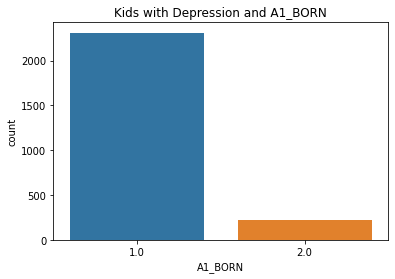

1.0    0.913043
2.0    0.086957
Name: A1_BORN, dtype: float64


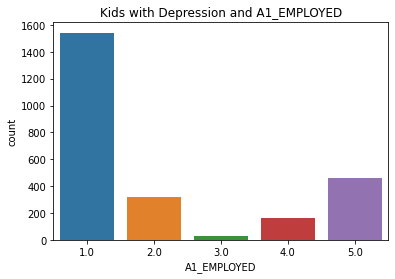

1.0    0.612724
5.0    0.182107
2.0    0.128032
4.0    0.065209
3.0    0.011928
Name: A1_EMPLOYED, dtype: float64


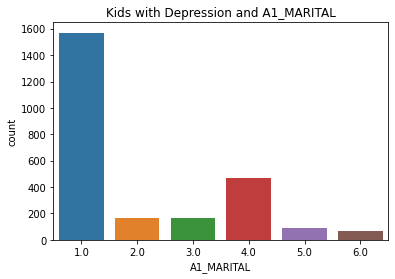

1.0    0.622619
4.0    0.186508
3.0    0.065476
2.0    0.065079
5.0    0.034921
6.0    0.025397
Name: A1_MARITAL, dtype: float64


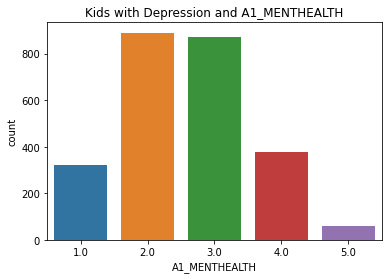

2.0    0.353175
3.0    0.345635
4.0    0.149206
1.0    0.128571
5.0    0.023413
Name: A1_MENTHEALTH, dtype: float64


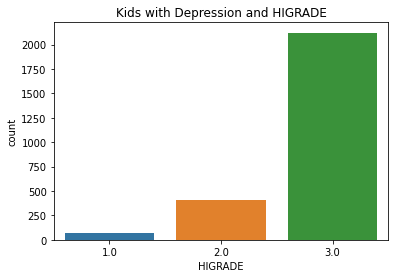

3.0    0.814587
2.0    0.157006
1.0    0.028407
Name: HIGRADE, dtype: float64


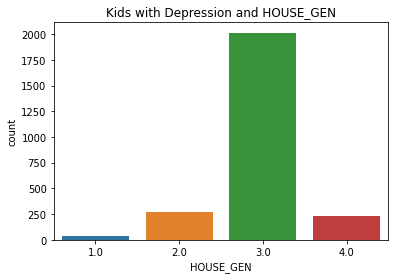

3.0    0.788175
2.0    0.106500
4.0    0.091229
1.0    0.014096
Name: HOUSE_GEN, dtype: float64


In [39]:
a1_info = ['A1_BORN', 'A1_EMPLOYED', 'A1_MARITAL', 'A1_MENTHEALTH', 'HIGRADE', 'HOUSE_GEN']

for i in a1_info:
    ax = sns.countplot(x=yes_depression[i])
    ax.set_title('Kids with Depression and ' + i)
    plt.show()
    print(yes_depression[i].value_counts(normalize=True)) # shows percentage per category